<a href="https://colab.research.google.com/github/PranavJagannathan/dataanalysis-using-python/blob/main/socialbuzz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1= pd.read_csv("/content/Content.csv")
df2= pd.read_csv("/content/ReactionTypes.csv")
df3= pd.read_csv("/content/Reactions.csv")

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [ ]:
df1.isnull()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,True
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [ ]:
df1.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [ ]:
df1= df1.drop("URL",axis=1)

In [ ]:
df1.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Category      0
dtype: int64

In [ ]:
df1["category"]=df1["Category"].str.replace('"'," ")

In [ ]:
df1.rename(columns={'Type': 'Content_type'}, inplace=True)

In [ ]:
df3.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [ ]:
df3.dropna(inplace= True)

In [ ]:
df3.isnull().sum()

Unnamed: 0    0
Content ID    0
User ID       0
Type          0
Datetime      0
dtype: int64

In [ ]:
df1= df1.drop("User ID",axis=1)

In [ ]:
df3= df3.drop("User ID")

In [ ]:
# Get the column names from each DataFrame
columns_df1 = set(df1.columns)
columns_df2 = set(df2.columns)
columns_df3 = set(df3.columns)

# Find the common columns
common_columns = columns_df1.intersection(columns_df2, columns_df3)
common_columns

{'Unnamed: 0'}

In [ ]:
# Step 1: Find the common columns
common_columns = set(df1.columns) & set(df2.columns) & set(df3.columns)

# Step 2: Merge df1 and df2 with df3 based on the common columns
for col in common_columns:
    if col in df1.columns and col in df3.columns:
        df3 = pd.merge(df3, df1, on=col, how='left')
    if col in df2.columns and col in df3.columns:
        df3 = pd.merge(df3, df2, on=col, how='left')

In [ ]:
df3.to_csv("social_buzz.csv",index=False)

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download('social_buzz.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df4= pd.read_csv("/content/finaldataset.csv")

In [ ]:
df4.columns

Index(['Unnamed: 0', 'Content ID', 'Reaction Type', 'Datetime', 'Content Type',
       'Category', 'Sentiment', 'Score'],
      dtype='object')

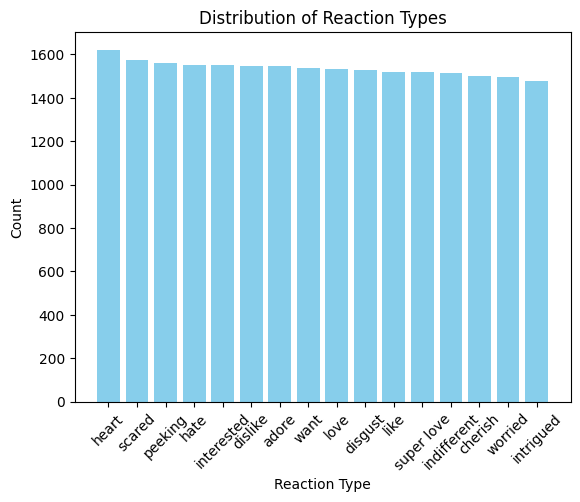

In [ ]:
df = pd.read_csv('finaldataset.csv')

# Bar Chart of Reaction Types
reaction_counts = df['Reaction Type'].value_counts()
plt.bar(reaction_counts.index, reaction_counts.values, color='skyblue')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.title('Distribution of Reaction Types')
plt.xticks(rotation=45)
plt.show()




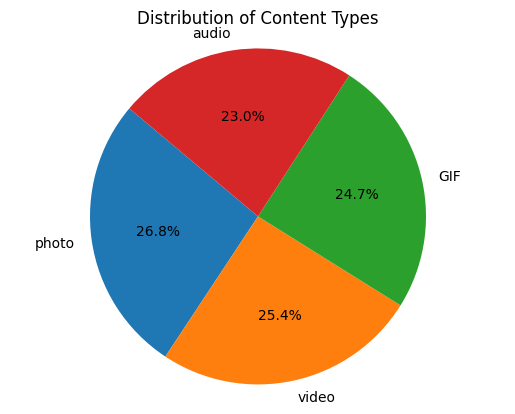

In [ ]:
# Pie Chart of Content Types
content_type_counts = df['Content Type'].value_counts()
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Content Types')
plt.show()


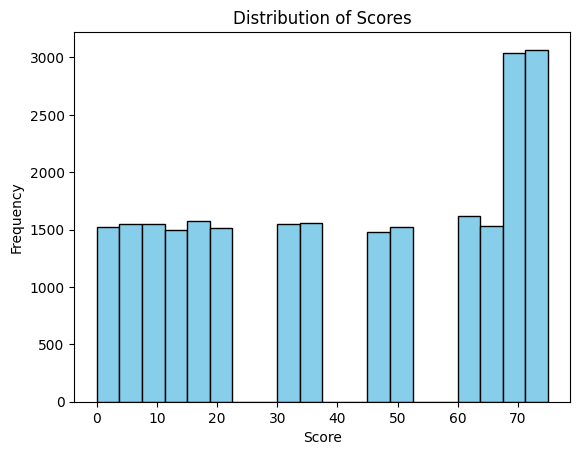

In [ ]:
# Histogram of Scores
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.show()

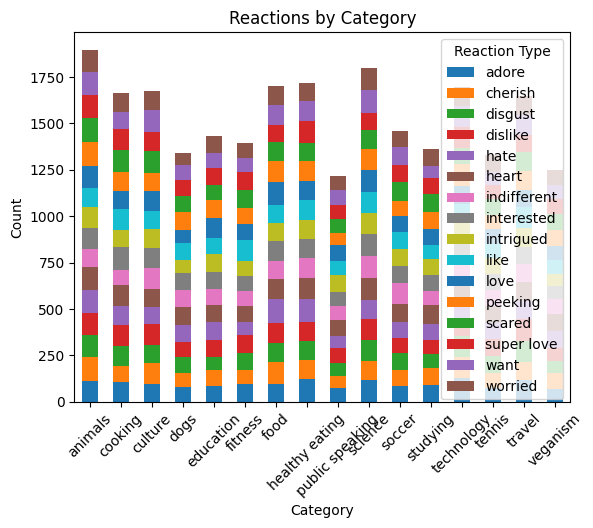

In [ ]:
# Stacked Bar Chart of Reactions by Category
reaction_category_counts = df.groupby('Category')['Reaction Type'].value_counts().unstack()
reaction_category_counts.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Reactions by Category')
plt.xticks(rotation=45)
plt.legend(title='Reaction Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

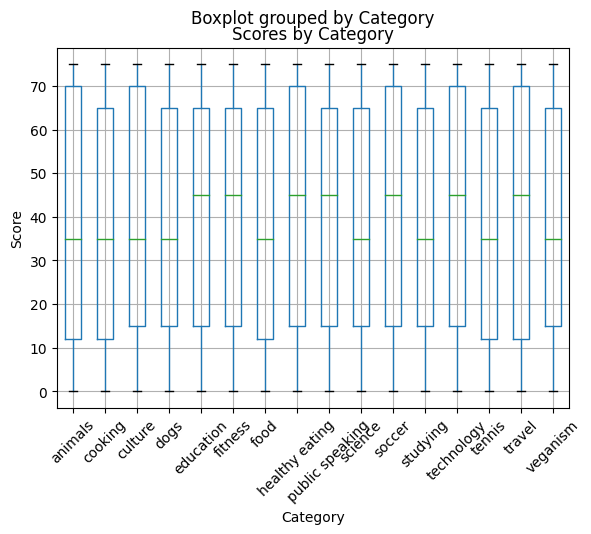

In [ ]:
# Box Plot of Scores by Category
plt.figure(figsize=(10, 6))
df.boxplot(column='Score', by='Category', rot=45)
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Scores by Category')
plt.show()

In [ ]:
num_unique_categories = df['Category'].nunique()
print("Number of unique categories:", num_unique_categories)

Number of unique categories: 16


In [ ]:
most_popular_category = df['Category'].value_counts().idxmax()
reactions_to_most_popular_category = df[df['Category'] == most_popular_category]['Reaction Type'].count()
print("Number of reactions to the most popular category (", most_popular_category, "):", reactions_to_most_popular_category)

Number of reactions to the most popular category ( animals ): 1897


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
month_with_most_posts = df['Month'].value_counts().idxmax()
print("Month with the most posts:", month_with_most_posts)

<ipython-input-47-9cb51ce98835>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


Month with the most posts: 1
